# THE SPARKS FOUNDATION

# BATCH: GRIPJUNE2022

# NAME: BOYA SHILPA

# DATA SCIENCE AND BUSINESS ANALYTICS

# TASK 6 - PREDICTION  USING DECISION TREE ALGORITHM

# Objective: Create Decision Tree Classifier and visualize it graphically

## STEP 1 - Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## STEP 2 - Importing data and exploring it

In [4]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
df["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lb=LabelEncoder()

In [15]:
df['Species']=lb.fit_transform(df['Species'])

In [16]:
df["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

## STEP 3 - Alotting data as x and y variables

In [20]:
x=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=df['Species']
print(type(x),type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(150, 4) (150,)


## Step 4 - Splitting data into training and testing data

In [21]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


## Step 5 - Building the mode

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtree=DecisionTreeClassifier()

In [31]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
predictions=dtree.predict(x_test)

## Step Printing the predicted type of species for test data 

In [33]:
pdf=pd.DataFrame(predictions,y_test,columns=['predictions'])


In [34]:
pdf

,predictions
Species,
0,0
2,2
1,1
2,2
0,0
2,2
0,0
0,0
0,0


## Step 6: Evaluating model i.e., calculating confusion_matrix & classification_report

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
print(confusion_matrix(y_test,predictions))

[[15  0  0]
 [ 0 10  0]
 [ 0  0 13]]


In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## CROSS VALIDATION

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
score=cross_val_score(DecisionTreeClassifier(),x,y,cv=3)

In [55]:
score.mean()

0.96

## TREE VISUALIZATION

In [56]:
from sklearn import tree

[Text(334.8, 498.3, 'X[3] <= 0.75\ngini = 0.666\nsamples = 112\nvalue = [35, 40, 37]'),
 Text(251.10000000000002, 407.70000000000005, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(418.5, 407.70000000000005, 'X[2] <= 4.95\ngini = 0.499\nsamples = 77\nvalue = [0, 40, 37]'),
 Text(167.4, 317.1, 'X[3] <= 1.65\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]'),
 Text(83.7, 226.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(251.10000000000002, 226.5, 'X[1] <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(167.4, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(334.8, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(669.6, 317.1, 'X[3] <= 1.75\ngini = 0.102\nsamples = 37\nvalue = [0, 2, 35]'),
 Text(585.9, 226.5, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(502.20000000000005, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(669.6, 135.89999999999998, 'X[2] <= 5.45\ngi

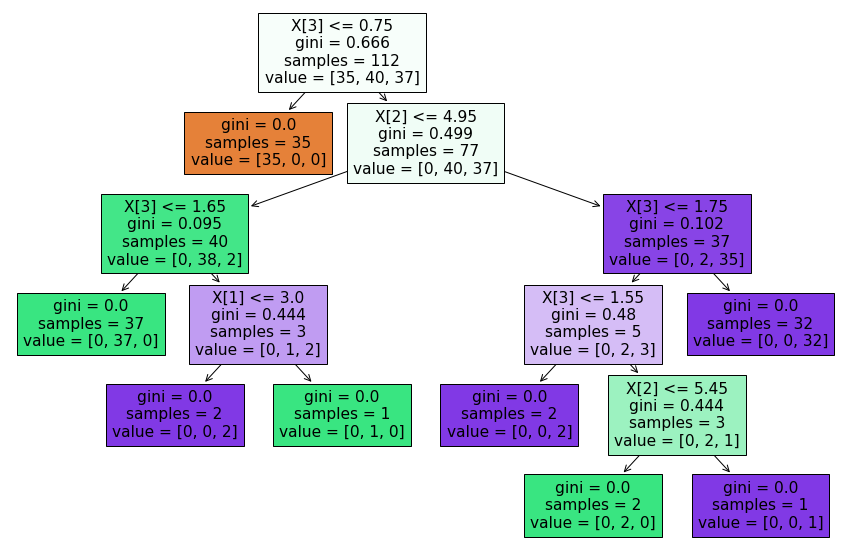

In [58]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True)

In [59]:
print(tree.export_text(dtree))

|--- feature_3 <= 0.75
|   |--- class: 0
|--- feature_3 >  0.75
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.00
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2

